# Analysis of 2016 Uber Request Data

The Uber Request data is a masked data set that provides a realisitc view of uber usage. The data includes information such as the Request ID, Driver ID, Pickup point, Status, Request timestamp and Drop off timestamp. The will be used to analyse the peak days and hours within the month and to see if there are any other patterns or trends that influence the number of rides. Furthermore, there is an opportunity to use this dataset to determine relationships between the different variables within the data to provide more insight.

Description of the dataset variables:

* __Request id__ - A unique identifier of the request.
* __Pickup point__ - The point from which the request was made.
* __Driver id__ - The unique identification number of the driver.
* __Status__ - The final status of the trip, can be either completed, cancelled by the driver or no cars available.
* __Request timestamp__ - The date and time at which the customer made the trip request.
* __Drop timestamp__ - The drop-off date and time, in case the trip was completed.

### Name: Dylan Neilson | Student ID: 47004029

# Document Setup

In [1]:
# Import required libraries for questions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset
dataset = pd.read_csv("data/uber_request_data.csv")

# Load dataset into DataFrame
data = dataset

# Display data to see it has loaded correctly and to find variables
data

Request id Pickup point  Driver id             Status Request timestamp  \
0            619      Airport        1.0     Trip Completed   11/7/2016 11:51   
1            867      Airport        1.0     Trip Completed   11/7/2016 17:57   
2           1807         City        1.0     Trip Completed    12/7/2016 9:17   
3           2532      Airport        1.0     Trip Completed   12/7/2016 21:08   
4           3112         City        1.0     Trip Completed    13/7/2016 8:33   
...          ...          ...        ...                ...               ...   
6740        6745         City        NaN  No Cars Available   15/7/2016 23:49   
6741        6752      Airport        NaN  No Cars Available   15/7/2016 23:50   
6742        6751         City        NaN  No Cars Available   15/7/2016 23:52   
6743        6754         City        NaN  No Cars Available   15/7/2016 23:54   
6744        6753      Airport        NaN  No Cars Available   15/7/2016 23:55   

       Drop timestamp  
0     11/7/2016 13:00  
1     11/7/2016 18:47  
2      12/7/2016 9:58  
3     12/7/2016 22:03  
4      13/7/2016 9:25  
...               ...  
6740              NaN  
6741              NaN  
6742              NaN  
6743              NaN  
6744              NaN  

[6745 rows x 6 columns]

# Task 1: Checking for missing data

### Q1. Check for missing values in all columns:

In [2]:
# Count number of missing values in each column
missing_values_count = data.isnull().sum()

# Filter to show only columns having at least one missing value
missing_values = missing_values_count[missing_values_count > 0]
    
# Display number of missing values for each column with missing values
print("Number of missing values for columns with missing values:")
for column in missing_values.index:
    count = missing_values[column]
    print(f"{column}: {count} missing values")

Number of missing values for columns with missing values:
Driver id: 2650 missing values
Drop timestamp: 3914 missing values


##### NOTE:
These results are expected as cancelled trips and no cars available trips would be missing these particular values. Now we can verify that it is these trips that are missing these values.

### Q2. Check for missing values in Completed, Cancelled & No Cars Available trips

In [3]:
# Filter rows where 'status' column is equal to "Trip Completed"
completed_trips = data[data['Status'] == 'Trip Completed']

# Check for missing values in each column
missing_values_completed = completed_trips.isnull().sum()
    
# Filter rows where 'status' column is equal to "Cancelled"
cancelled_trips = data[data['Status'] == 'Cancelled']

# Check for missing values in each column
missing_values_cancelled = cancelled_trips.isnull().sum()

# Filter rows where 'status' column is equal to "No Cars Available"
unavailable_trips = data[data['Status'] == 'No Cars Available']

# Check for missing values in each column
missing_values_unavailable = unavailable_trips.isnull().sum()

# Display number of missing values for each column for Completed, Cancelled & No Cars Available trips
missing_values_df = pd.concat([missing_values_completed, missing_values_cancelled, missing_values_unavailable], axis=1)
missing_values_df.columns = ['Completed trips', 'Cancelled trips', 'Unavailable trips']

#Print Dataframe
missing_values_df

Completed trips  Cancelled trips  Unavailable trips
Request id                       0                0                  0
Pickup point                     0                0                  0
Driver id                        0                0               2650
Status                           0                0                  0
Request timestamp                0                0                  0
Drop timestamp                   0             1264               2650

### Observation: 
The completed trips had no missing values. It is to be expected that the Cancelled trips only have missing data in the Drop timestampe column as the trip never picked up or dropped off a passenger. It is also expected that the No Cars Available trips have missing data in both the Driver id and Drop timestamp columns as these trips would have never been assigned a driver as well as not having a drop off point.

# Task 2: Trips

### Q1. Find the total amount of trips and how many were Completed, Cancelled or Unavailable

In [4]:
# Group the dataframe by Status and count the number of unique Requests
trip_counts = data.groupby('Status')['Request id'].nunique().reset_index()

# Rename the columns of the resulting dataframe
trip_counts.columns = ['Status', 'Trip count']

# Get the total number of trips
total_trips = trip_counts['Trip count'].sum()
print(f"Total number of trips: {total_trips}")

# Display the resulting dataframe
trip_counts

Total number of trips: 6745


Status  Trip count
0          Cancelled        1264
1  No Cars Available        2650
2     Trip Completed        2831

<Figure size 640x480 with 0 Axes>

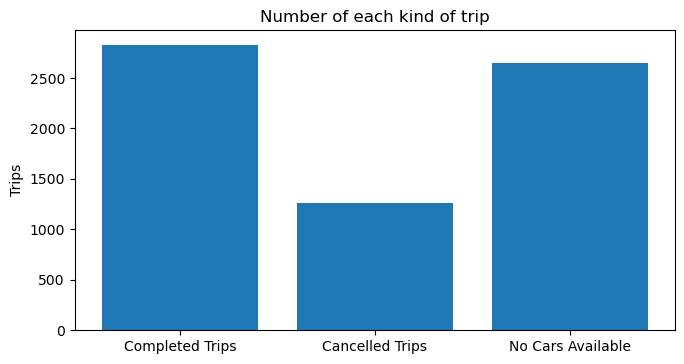

In [5]:
fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])

#fig = plt.xlabel('Trip Type')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Number of each kind of trip")

trip_type = ['Completed Trips', 'Cancelled Trips', 'No Cars Available']
trips = [2831, 1264, 2650]
ax.bar(trip_type, trips)
plt.show()

<Figure size 640x480 with 0 Axes>

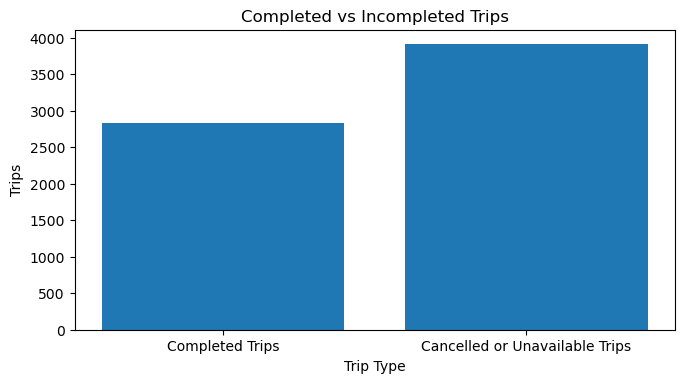

In [6]:
fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])

fig = plt.xlabel('Trip Type')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Completed vs Incompleted Trips")

trip_type = ['Completed Trips', 'Cancelled or Unavailable Trips']
trips = [2831, 3914]
ax.bar(trip_type, trips)
plt.show()

### Observation: 
There was a greater amount of cancelled or Unavailable requests compared to the amount of completed trips in the datasets timeframe. This could be an indication that the demand for trips are during hours in which there are a low amount of drivers available.

### Q2. Find the range of dates in the dataset

In [7]:
# Convert the 'Request timestamp' column to a datetime format
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], format='%d/%m/%Y %H:%M')

# Sort dataframe by the 'Request timestamp' column in ascending order
data_date_sorted = data.sort_values('Request timestamp', ascending=True)

# Extract the earliest and latest dates in the 'Request timestamp' column
earliest_date = data_date_sorted['Request timestamp'].iloc[0].strftime('%d/%m/%Y')
latest_date = data_date_sorted['Request timestamp'].iloc[-1].strftime('%d/%m/%Y')

# Print the date range
print(f"Date range: {earliest_date} - {latest_date}")

# Display Dataframe
data_date_sorted

Date range: 11/07/2016 - 15/07/2016


Request id Pickup point  Driver id             Status  \
1303        1363      Airport      136.0     Trip Completed   
4095        1362         City        NaN  No Cars Available   
1462        1367         City      155.0     Trip Completed   
4096        1364         City        NaN  No Cars Available   
4097        1366         City        NaN  No Cars Available   
...          ...          ...        ...                ...   
6744        6753      Airport        NaN  No Cars Available   
1095        6755      Airport      113.0     Trip Completed   
1319        6756         City      137.0     Trip Completed   
2401        6757      Airport      251.0     Trip Completed   
3339        6759         City      125.0          Cancelled   

       Request timestamp  Drop timestamp  
1303 2016-07-11 00:00:00  11/7/2016 1:11  
4095 2016-07-11 00:02:00             NaN  
1462 2016-07-11 00:05:00  11/7/2016 1:06  
4096 2016-07-11 00:06:00             NaN  
4097 2016-07-11 00:09:00             NaN  
...                  ...             ...  
6744 2016-07-15 23:55:00             NaN  
1095 2016-07-15 23:57:00  16/7/2016 1:09  
1319 2016-07-15 23:57:00  16/7/2016 0:51  
2401 2016-07-15 23:59:00  16/7/2016 0:30  
3339 2016-07-15 23:59:00             NaN  

[6745 rows x 6 columns]

# Task 3: Trips / Day Relationship

### Q1. Find how many completed, cancelled, unavailable trips and requests were made per day

In [8]:
# Create a list of dates to count 'Request id' values for
date_list = ['11/07/2016', '12/07/2016', '13/07/2016', '14/07/2016', '15/07/2016']

# Create a new dataframe to store the results
requests_per_day_df = pd.DataFrame(columns=['Date', 'Total Completed', 'Total Cancelled', 'Total Unavailable', 'Total Requests'])

# Loop over the list of dates and count 'Request id' values for each date
for date in date_list:
    # Filter the dataframe to include only the rows where 'Request timestamp' matches the date
    date_filter = data['Request timestamp'].dt.date == pd.to_datetime(date, format='%d/%m/%Y').date()
    filtered_df = data[date_filter]
    
    # Count the number of unique 'Request id' values in the filtered dataframe
    total_request_count = filtered_df['Request id'].nunique()
    
    # Count the number of unique 'Request id' values where the status is "Trip Completed"
    completed_filter = filtered_df['Status'] == "Trip Completed"
    completed_count = filtered_df[completed_filter]['Request id'].nunique()
    
    # Count the number of unique 'Request id' values where the status is "Cancelled"
    cancelled_filter = filtered_df['Status'] == "Cancelled"
    cancelled_count = filtered_df[cancelled_filter]['Request id'].nunique()
    
    # Count the number of unique 'Request id' values where the status is "No Cars Available"
    unavailable_filter = filtered_df['Status'] == "No Cars Available"
    unavailable_count = filtered_df[unavailable_filter]['Request id'].nunique()
    
    # Add the results to the new dataframe
    requests_per_day_df = pd.concat([requests_per_day_df, pd.DataFrame(
        {'Date': [date],'Total Completed': [completed_count], 
         'Total Cancelled': [cancelled_count], 
         'Total Unavailable': [unavailable_count], 
         'Total Requests': [total_request_count]})],ignore_index=True)

# Print dataframe
requests_per_day_df

Date Total Completed Total Cancelled Total Unavailable Total Requests
0  11/07/2016             601             262               504           1367
1  12/07/2016             562             240               505           1307
2  13/07/2016             577             270               490           1337
3  14/07/2016             530             252               571           1353
4  15/07/2016             561             240               580           1381

<Figure size 640x480 with 0 Axes>

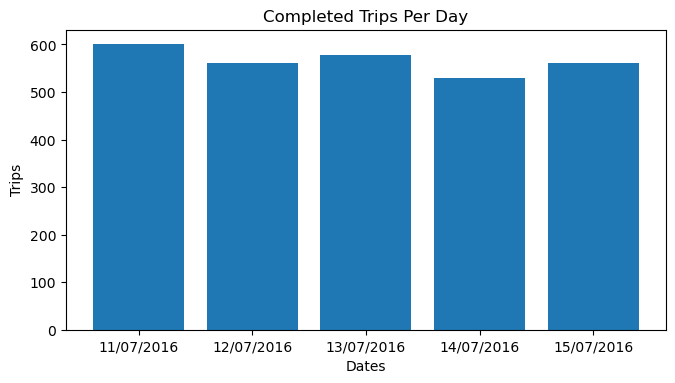

In [9]:
fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])
fig = plt.xlabel('Dates')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Completed Trips Per Day")

dates = ['11/07/2016', '12/07/2016', '13/07/2016', '14/07/2016', '15/07/2016']
trips = [601, 562, 577, 530, 561]
ax.bar(dates, trips)
plt.show()

<Figure size 640x480 with 0 Axes>

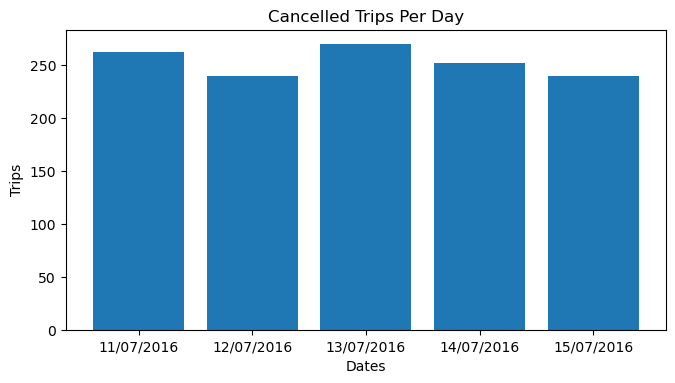

In [10]:
fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])
fig = plt.xlabel('Dates')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Cancelled Trips Per Day")

dates = ['11/07/2016', '12/07/2016', '13/07/2016', '14/07/2016', '15/07/2016']
trips = [262, 240, 270, 252, 240]
ax.bar(dates, trips)
plt.show()

<Figure size 640x480 with 0 Axes>

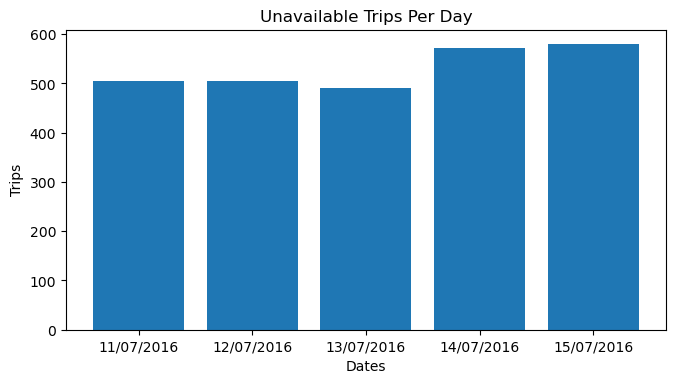

In [11]:
fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])
fig = plt.xlabel('Dates')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Unavailable Trips Per Day")

dates = ['11/07/2016', '12/07/2016', '13/07/2016', '14/07/2016', '15/07/2016']
trips = [504, 505, 490, 571, 580]
ax.bar(dates, trips)
plt.show()

### Observation: 
It appears that through the range of days in the dataset, The completed, cancelled and unavailable trips were relatively evenly distributed throughout the days.

# Task 4: Trips / Drivers Relationship

### Q1. Find how many unique drivers are in the dataset

In [12]:
# Get the total number of unique drivers
unique_drivers_count = data['Driver id'].nunique()
print(f"Total number of unique drivers: {unique_drivers_count}")

Total number of unique drivers: 300


### Q2. Find how many drivers completed or cancelled trips

In [13]:
# Create a new dataframe
driver_trips_df = pd.DataFrame(columns=['Drivers Completed', 'Drivers Cancelled'])

# Count the number of unique drivers where the status is "Trip Completed"
completed_filter = data['Status'] == "Trip Completed"
completed_count = data[completed_filter]['Driver id'].nunique()

# Count the number of unique drivers values where the status is "Cancelled"
cancelled_filter = data['Status'] == "Cancelled"
cancelled_count = data[cancelled_filter]['Driver id'].nunique()

# Add the results to the dataframe
driver_trips_df = pd.concat([driver_trips_df, pd.DataFrame(
    {'Drivers Completed': [completed_count], 
     'Drivers Cancelled': [cancelled_count]})],ignore_index=True)

# Print DataFrame
driver_trips_df

Drivers Completed Drivers Cancelled
0               300               295

<Figure size 640x480 with 0 Axes>

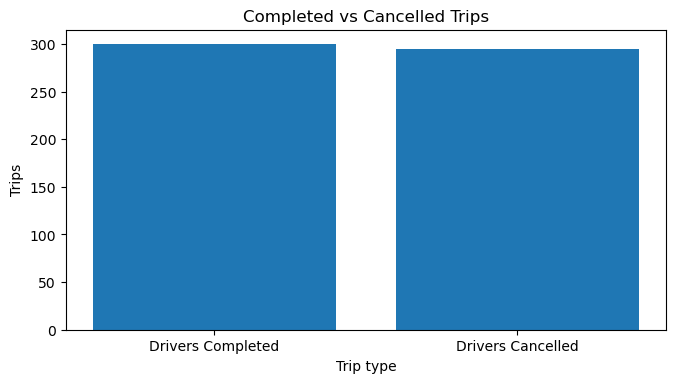

In [14]:
fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])
fig = plt.xlabel('Trip type')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Completed vs Cancelled Trips")

drivers = ['Drivers Completed', 'Drivers Cancelled']
trips = [300, 295]
ax.bar(drivers, trips)
plt.show()

### Observation: 
There was an almost even amount of drivers who completed and cancelled trip requests.

### Q3. Find how many trips were completed or cancelled by each driver

In [15]:
# Filter the DataFrame to only include rows where Status is "Trip Completed" or "Cancelled"
filtered_data = data[data['Status'].isin(['Trip Completed', 'Cancelled'])]

# Group the rows by Driver ID and Status, and count the occurrences of each unique combination
grouped_data = filtered_data.groupby(['Driver id', 'Status']).size().unstack(fill_value=0)

# Rename the columns
grouped_data.columns = ['Cancelled Trips', 'Completed Trips']

# Reset the index to add Driver ID as a column
grouped_data = grouped_data.reset_index()

# Sort the DataFrame by Driver ID
sorted_data = grouped_data.sort_values('Driver id')

# Reorder the columns
sorted_data = sorted_data[['Driver id', 'Completed Trips', 'Cancelled Trips']]

# Print DataFrame
sorted_data

Driver id  Completed Trips  Cancelled Trips
0          1.0                9                4
1          2.0                9                4
2          3.0               10                4
3          4.0               10                5
4          5.0               11                2
..         ...              ...              ...
295      296.0               10                4
296      297.0               11                4
297      298.0               11                4
298      299.0                7                5
299      300.0                5                1

[300 rows x 3 columns]

In [16]:
# calculate the average of the "Completed Trips" column
average_completed_trips = sorted_data['Completed Trips'].mean()
# calculate the average of the "Cancelled Trips" column
average_cancelled_trips = sorted_data['Cancelled Trips'].mean()

print(f"The average amount of Completed trips by each driver: {average_completed_trips}")
print(f"The average amount of Completed trips by each driver: {average_cancelled_trips}")

The average amount of Completed trips by each driver: 9.436666666666667
The average amount of Completed trips by each driver: 4.213333333333333


<Figure size 640x480 with 0 Axes>

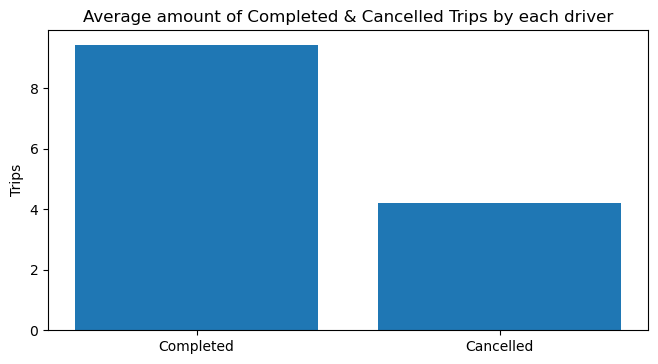

In [17]:
fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])
fig = plt.xlabel('')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Average amount of Completed & Cancelled Trips by each driver")

drivers = ['Completed', 'Cancelled']
trips = [9.436666666666667, 4.213333333333333]
ax.bar(drivers, trips)
plt.show()

### Observation: 
On average, drivers were able to complete more trips than what they cancelled.

# Task 5: Time

### Q1. Find duration of each trip

In [18]:
# Convert 'Request timestamp' and 'Drop timestamp' to datetime objects
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], format='%d/%m/%Y %H:%M')
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'], format='%d/%m/%Y %H:%M')

# Calculate duration of the trip in minutes
data['Trip Duration'] = (data['Drop timestamp'] - data['Request timestamp']).dt.total_seconds() / 60

# Filter rows where 'Status' is 'Trip Completed'
completed_trips = data[data['Status'] == 'Trip Completed']

# Create a new DataFrame containing only the duration of completed trips
completed_trips_duration = completed_trips[['Trip Duration']]

# Print DataFrame
completed_trips_duration

Trip Duration
0              69.0
1              50.0
2              41.0
3              55.0
4              52.0
...             ...
2826           41.0
2827           49.0
2828           43.0
2829           77.0
2830           49.0

[2831 rows x 1 columns]

In [19]:
# calculate the average of the "Completed Trips" column
average_completed_trips_duration = completed_trips_duration['Trip Duration'].mean()

print(f"The average length of completed trips: {average_completed_trips_duration} minutes")

The average length of completed trips: 52.41151536559519 minutes


### Q2. Find how many trips were requested for each hour

In [20]:
# Convert 'Request timestamp' to datetime object
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], format='%d/%m/%Y %H:%M')

# Group the dataset by hour
requests_per_hour = data.groupby(data['Request timestamp'].dt.hour)['Request id'].count()

# Convert to DataFrame and reset the index
requests_per_hour_df = requests_per_hour.to_frame().reset_index()

# Rename columns
requests_per_hour_df.columns = ['Hour', 'Number of Requests']

# Print DataFrame
requests_per_hour_df

Hour  Number of Requests
0      0                  99
1      1                  85
2      2                  99
3      3                  92
4      4                 203
5      5                 445
6      6                 398
7      7                 406
8      8                 423
9      9                 431
10    10                 243
11    11                 171
12    12                 184
13    13                 160
14    14                 136
15    15                 171
16    16                 159
17    17                 418
18    18                 510
19    19                 473
20    20                 492
21    21                 449
22    22                 304
23    23                 194

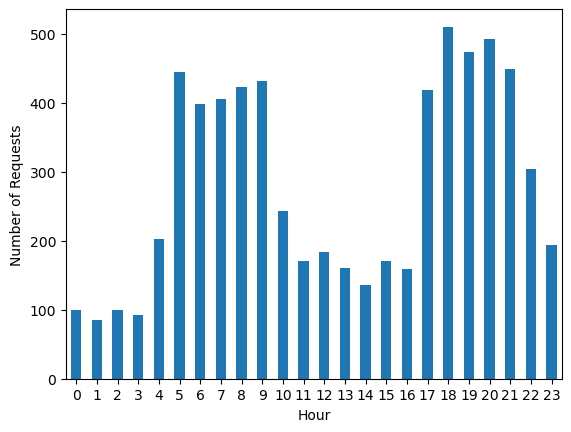

In [21]:
# set the driver id as the index
requests_per_hour_df.set_index('Hour', inplace=True)

# create a bar plot of the "Completed Trips" column
ax = requests_per_hour_df['Number of Requests'].plot.bar(rot=0)

# set the x and y axis labels
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Requests')

# show the plot
plt.show()

### Observation: 
The average length of a completed trip was around 52 minutes, with the busiest times being between 5am to 9am and 5pm to 10pm.

### Q3. Find the hours of when trips were completed

In [22]:
# Filter the DataFrame to only include rows where 'Status' is equal to 'Trip Completed'
completed_trips_df = data[data['Status'] == 'Trip Completed']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
completed_trips_timestamps_df = completed_trips_df[['Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(completed_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
completed_trips_timestamps_df

Time range: 00:00 - 23:59


Request timestamp      Drop timestamp
0    2016-07-11 11:51:00 2016-07-11 13:00:00
1    2016-07-11 17:57:00 2016-07-11 18:47:00
2    2016-07-12 09:17:00 2016-07-12 09:58:00
3    2016-07-12 21:08:00 2016-07-12 22:03:00
4    2016-07-13 08:33:00 2016-07-13 09:25:00
...                  ...                 ...
2826 2016-07-11 22:54:00 2016-07-11 23:35:00
2827 2016-07-13 06:31:00 2016-07-13 07:20:00
2828 2016-07-13 12:33:00 2016-07-13 13:16:00
2829 2016-07-13 22:26:00 2016-07-13 23:43:00
2830 2016-07-15 09:07:00 2016-07-15 09:56:00

[2831 rows x 2 columns]

### Q4. Find the hours of when trips were cancelled

In [23]:
# Filter DataFrame to only include rows where 'Status' is equal to 'Cancelled'
cancelled_trips_df = data[data['Status'] == 'Cancelled']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
cancelled_trips_timestamps_df = cancelled_trips_df[['Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(cancelled_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
cancelled_trips_timestamps_df

Time range: 00:00 - 23:59


Request timestamp Drop timestamp
2831 2016-07-13 06:08:00            NaT
2832 2016-07-14 17:07:00            NaT
2833 2016-07-14 20:51:00            NaT
2834 2016-07-15 10:12:00            NaT
2835 2016-07-12 19:14:00            NaT
...                  ...            ...
4090 2016-07-12 07:20:00            NaT
4091 2016-07-14 05:03:00            NaT
4092 2016-07-14 05:06:00            NaT
4093 2016-07-14 08:30:00            NaT
4094 2016-07-14 05:46:00            NaT

[1264 rows x 2 columns]

### Q5. Find the hours of when no cars were available

In [24]:
# Filter DataFrame to only include rows where 'Status' is equal to 'No Cars Available'
unavailable_trips_df = data[data['Status'] == 'No Cars Available']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
unavailable_trips_timestamps_df = unavailable_trips_df[['Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(unavailable_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
unavailable_trips_timestamps_df

Time range: 00:02 - 23:59


Request timestamp Drop timestamp
4095 2016-07-11 00:02:00            NaT
4096 2016-07-11 00:06:00            NaT
4097 2016-07-11 00:09:00            NaT
4098 2016-07-11 00:23:00            NaT
4099 2016-07-11 00:30:00            NaT
...                  ...            ...
6740 2016-07-15 23:49:00            NaT
6741 2016-07-15 23:50:00            NaT
6742 2016-07-15 23:52:00            NaT
6743 2016-07-15 23:54:00            NaT
6744 2016-07-15 23:55:00            NaT

[2650 rows x 2 columns]

# Task 6: Trips / Driver / Location Relationship

### Q1. Find the locations in the dataset

In [25]:
# Get the unique values in the 'Pickup point' column
pickup_points = data['Pickup point'].unique()

# Create DataFrame
pickup_points_df = pd.DataFrame({'Pickup point': pickup_points})

# Print DataFrame
pickup_points_df

Pickup point
0      Airport
1         City

### Q2. Find how many unqiue drivers per location

In [26]:
# Group data by "Pickup point" and count number of unique drivers
driver_per_loc_group = data.groupby("Pickup point")["Driver id"].nunique()

# Convert to DataFrame
driver_per_loc_df = driver_per_loc_group.to_frame().reset_index()

# Rename columns
driver_per_loc_df.columns = ['Pickup Point', 'Unique Drivers']

# Print DataFrame
driver_per_loc_df

Pickup Point  Unique Drivers
0      Airport             300
1         City             300

<Figure size 640x480 with 0 Axes>

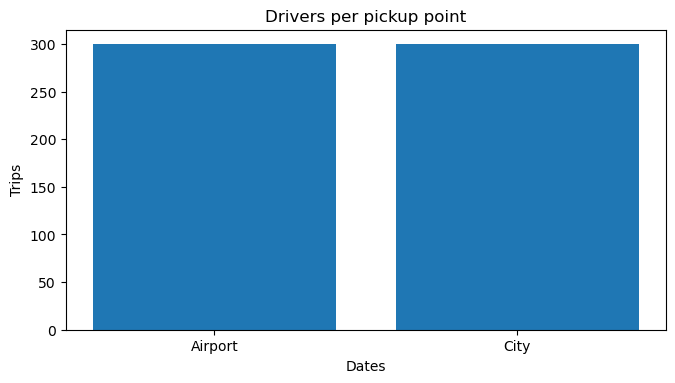

In [27]:
fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])
fig = plt.xlabel('Dates')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Drivers per pickup point")

locations = ['Airport', 'City']
drivers = [300, 300]
ax.bar(locations, drivers)
plt.show()

### Observation: 
Within the dataset, there was an even split of drivers in both the "Airpot" and "City" location.

### Q3. Find how many trips were completed, cancelled or unavailable per location

In [28]:
# Create pivot table
pivot_table = pd.pivot_table(data, values='Request id', index='Pickup point', columns='Status', aggfunc='count', fill_value=0)

# Rename columns
pivot_table.columns = ['Trips Cancelled', 'Unavailable Trips', 'Trips Completed']

# Reset index to make "Pickup Point" column a regular column
pivot_table = pivot_table.reset_index()

# Add a new column that displays total amount of "Request id" for each "Pickup point"
pivot_table['Total Trips'] = pivot_table[['Trips Completed', 'Trips Cancelled', 'Unavailable Trips']].sum(axis=1)

# Reorder columns
pivot_table = pivot_table[['Pickup point', 'Trips Completed', 'Trips Cancelled', 'Unavailable Trips', 'Total Trips']]

# Print DataFrame
pivot_table

Pickup point  Trips Completed  Trips Cancelled  Unavailable Trips  \
0      Airport             1327              198               1713   
1         City             1504             1066                937   

   Total Trips  
0         3238  
1         3507

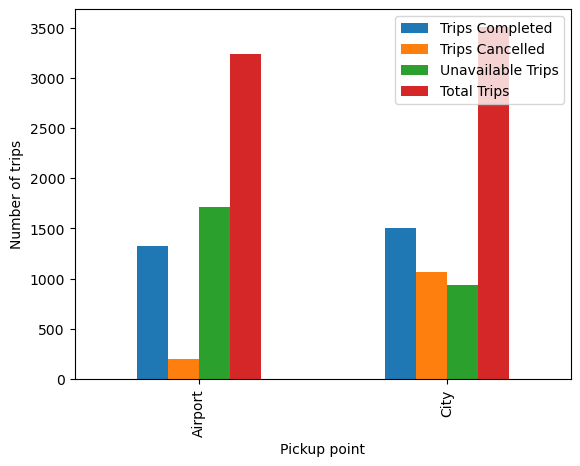

In [29]:
# set the driver id as the index
pivot_table.set_index('Pickup point', inplace=True)

# plot the bar chart
ax = pivot_table.plot.bar()

# set the y-axis label
ax.set_ylabel('Number of trips')

# show the plot
plt.show()

### Observation: 
This plot indicates that while there were less cancelled trips at the Airport location, there was also a greater amount of unavailable requests. Which indicates that a higher demand in this location vs the supply of drivers. 

The City had more completed trips compared to the relatively even split of cancelled and unavailable trips. It would appear that supply could still not keep up with demand as more trips were cancelled. 

# Task 7: Time / Location Relationship

### Q1. Find duration of the trips per location

In [30]:
# Convert 'Request timestamp' and 'Drop timestamp' to datetime objects
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], format='%d/%m/%Y %H:%M')
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'], format='%d/%m/%Y %H:%M')

# Calculate duration of the trip in minutes
data['Trip Duration'] = (data['Drop timestamp'] - data['Request timestamp']).dt.total_seconds() / 60

# Filter rows where 'Status' is 'Trip Completed'
completed_trips = data[data['Status'] == 'Trip Completed']

# Filter rows where 'Pickup point' is 'Airport'
completed_trips_airport = completed_trips[completed_trips['Pickup point'] == 'Airport']

# Create a DataFrame containing only the duration of completed trips where 'Pickup point' is 'Airport'
completed_trips_airport_duration = completed_trips_airport[['Pickup point', 'Trip Duration']]

# Print DataFrame
completed_trips_airport_duration

Pickup point  Trip Duration
0         Airport           69.0
1         Airport           50.0
3         Airport           55.0
5         Airport           31.0
6         Airport           58.0
...           ...            ...
2822      Airport           53.0
2826      Airport           41.0
2828      Airport           43.0
2829      Airport           77.0
2830      Airport           49.0

[1327 rows x 2 columns]

In [31]:
# Convert 'Request timestamp' and 'Drop timestamp' to datetime objects
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'], format='%d/%m/%Y %H:%M')
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'], format='%d/%m/%Y %H:%M')

# Calculate duration of the trip in minutes
data['Trip Duration'] = (data['Drop timestamp'] - data['Request timestamp']).dt.total_seconds() / 60

# Filter rows where 'Status' is 'Trip Completed'
completed_trips = data[data['Status'] == 'Trip Completed']

# Filter rows where 'Pickup point' is 'City'
completed_trips_city = completed_trips[completed_trips['Pickup point'] == 'City']

# Create a DataFrame containing only the duration of completed trips where 'Pickup point' is 'City'
completed_trips_city_duration = completed_trips_city[['Pickup point', 'Trip Duration']]

# Print DataFrame
completed_trips_city_duration

Pickup point  Trip Duration
2            City           41.0
4            City           52.0
8            City           53.0
9            City           39.0
11           City           27.0
...           ...            ...
2820         City           45.0
2823         City           68.0
2824         City           44.0
2825         City           48.0
2827         City           49.0

[1504 rows x 2 columns]

<Figure size 640x480 with 0 Axes>

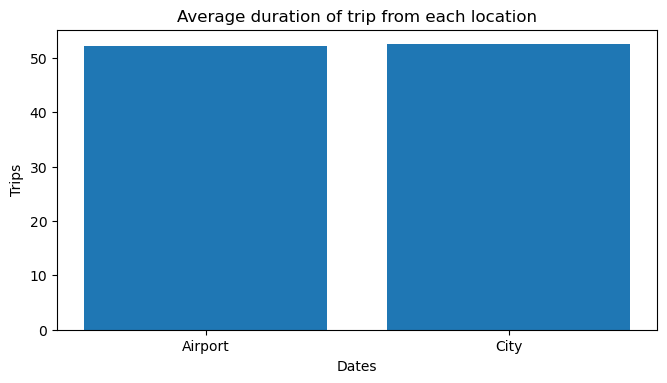

In [32]:
average_airport_duration = completed_trips_airport_duration['Trip Duration'].mean()
average_city_duration = completed_trips_city_duration['Trip Duration'].mean()

fig = plt.figure()
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0,0,1,1])
fig = plt.xlabel('Dates')
fig = plt.ylabel('Trips') 
  
# displaying the title
fig = plt.title("Average duration of trip from each location")

locations = ['Airport', 'City']
trip_duration = [average_airport_duration, average_city_duration]
ax.bar(locations, trip_duration)
plt.show()

### Observation: 
On average the duration of trips between the two locations was greatly similar.

### Q2. Find the hours of when trips were completed per location

#### Airport

In [33]:
# Filter the DataFrame to only include rows where 'Status' is equal to 'Trip Completed'
completed_trips_df = data[data['Status'] == 'Trip Completed']

# Filter the DataFrame to only include rows where 'Pickup point' is equal to 'Airport'
completed_loc_trips_df = completed_trips_df[completed_trips_df['Pickup point'] == 'Airport']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
completed_trips_timestamps_df = completed_loc_trips_df[['Pickup point','Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(completed_loc_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
completed_trips_timestamps_df

Time range: 00:00 - 23:59


Pickup point   Request timestamp      Drop timestamp
0         Airport 2016-07-11 11:51:00 2016-07-11 13:00:00
1         Airport 2016-07-11 17:57:00 2016-07-11 18:47:00
3         Airport 2016-07-12 21:08:00 2016-07-12 22:03:00
5         Airport 2016-07-13 21:57:00 2016-07-13 22:28:00
6         Airport 2016-07-14 06:15:00 2016-07-14 07:13:00
...           ...                 ...                 ...
2822      Airport 2016-07-13 21:12:00 2016-07-13 22:05:00
2826      Airport 2016-07-11 22:54:00 2016-07-11 23:35:00
2828      Airport 2016-07-13 12:33:00 2016-07-13 13:16:00
2829      Airport 2016-07-13 22:26:00 2016-07-13 23:43:00
2830      Airport 2016-07-15 09:07:00 2016-07-15 09:56:00

[1327 rows x 3 columns]

#### City

In [34]:
# Filter the DataFrame to only include rows where 'Status' is equal to 'Trip Completed'
completed_trips_df = data[data['Status'] == 'Trip Completed']

# Filter the DataFrame to only include rows where 'Pickup point' is equal to 'City'
completed_loc_trips_df = completed_trips_df[completed_trips_df['Pickup point'] == 'City']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
completed_trips_timestamps_df = completed_loc_trips_df[['Pickup point','Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(completed_loc_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
completed_trips_timestamps_df

Time range: 00:03 - 23:58


Pickup point   Request timestamp      Drop timestamp
2            City 2016-07-12 09:17:00 2016-07-12 09:58:00
4            City 2016-07-13 08:33:00 2016-07-13 09:25:00
8            City 2016-07-15 17:57:00 2016-07-15 18:50:00
9            City 2016-07-11 06:46:00 2016-07-11 07:25:00
11           City 2016-07-12 12:30:00 2016-07-12 12:57:00
...           ...                 ...                 ...
2820         City 2016-07-12 18:24:00 2016-07-12 19:09:00
2823         City 2016-07-14 08:46:00 2016-07-14 09:54:00
2824         City 2016-07-14 20:28:00 2016-07-14 21:12:00
2825         City 2016-07-15 18:31:00 2016-07-15 19:19:00
2827         City 2016-07-13 06:31:00 2016-07-13 07:20:00

[1504 rows x 3 columns]

### Q3. Find the hours of when trips were cancelled per location

#### Airport

In [35]:
# Filter the DataFrame to only include rows where 'Status' is equal to 'Cancelled'
cancelled_trips_df = data[data['Status'] == 'Cancelled']

# Filter the DataFrame to only include rows where 'Pickup point' is equal to 'Airport'
cancelled_loc_trips_df = cancelled_trips_df[cancelled_trips_df['Pickup point'] == 'Airport']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
cancelled_trips_timestamps_df = cancelled_loc_trips_df[['Pickup point','Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(cancelled_loc_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
cancelled_trips_timestamps_df

Time range: 04:45 - 22:12


Pickup point   Request timestamp Drop timestamp
2833      Airport 2016-07-14 20:51:00            NaT
2835      Airport 2016-07-12 19:14:00            NaT
2836      Airport 2016-07-13 20:57:00            NaT
2838      Airport 2016-07-14 19:04:00            NaT
2841      Airport 2016-07-12 09:59:00            NaT
...           ...                 ...            ...
4043      Airport 2016-07-13 16:53:00            NaT
4044      Airport 2016-07-13 21:28:00            NaT
4046      Airport 2016-07-14 12:45:00            NaT
4049      Airport 2016-07-12 15:51:00            NaT
4081      Airport 2016-07-11 07:10:00            NaT

[198 rows x 3 columns]

#### City

In [36]:
# Filter the DataFrame to only include rows where 'Status' is equal to 'Cancelled'
cancelled_trips_df = data[data['Status'] == 'Cancelled']

# Filter the DataFrame to only include rows where 'Pickup point' is equal to 'City'
cancelled_loc_trips_df = cancelled_trips_df[cancelled_trips_df['Pickup point'] == 'City']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
cancelled_trips_timestamps_df = cancelled_loc_trips_df[['Pickup point','Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(cancelled_loc_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
cancelled_trips_timestamps_df

Time range: 00:00 - 23:59


Pickup point   Request timestamp Drop timestamp
2831         City 2016-07-13 06:08:00            NaT
2832         City 2016-07-14 17:07:00            NaT
2834         City 2016-07-15 10:12:00            NaT
2837         City 2016-07-14 08:38:00            NaT
2839         City 2016-07-11 04:47:00            NaT
...           ...                 ...            ...
4090         City 2016-07-12 07:20:00            NaT
4091         City 2016-07-14 05:03:00            NaT
4092         City 2016-07-14 05:06:00            NaT
4093         City 2016-07-14 08:30:00            NaT
4094         City 2016-07-14 05:46:00            NaT

[1066 rows x 3 columns]

### Q4. Find the hours of when no cars were available per location

#### Airport

In [37]:
# Filter the DataFrame to only include rows where 'Status' is equal to 'No Cars Available'
unavailable_trips_df = data[data['Status'] == 'No Cars Available']

# Filter the DataFrame to only include rows where 'Pickup point' is equal to 'Airport'
unavailable_loc_trips_df = unavailable_trips_df[unavailable_trips_df['Pickup point'] == 'Airport']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
unavailable_trips_timestamps_df = unavailable_loc_trips_df[['Pickup point','Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(unavailable_loc_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
unavailable_trips_timestamps_df

Time range: 00:02 - 23:55


Pickup point   Request timestamp Drop timestamp
4098      Airport 2016-07-11 00:23:00            NaT
4099      Airport 2016-07-11 00:30:00            NaT
4104      Airport 2016-07-11 01:09:00            NaT
4105      Airport 2016-07-11 01:10:00            NaT
4108      Airport 2016-07-11 01:16:00            NaT
...           ...                 ...            ...
6734      Airport 2016-07-15 23:35:00            NaT
6735      Airport 2016-07-15 23:39:00            NaT
6736      Airport 2016-07-15 23:42:00            NaT
6741      Airport 2016-07-15 23:50:00            NaT
6744      Airport 2016-07-15 23:55:00            NaT

[1713 rows x 3 columns]

#### City

In [38]:
# Filter the DataFrame to only include rows where 'Status' is equal to 'No Cars Available'
unavailable_trips_df = data[data['Status'] == 'No Cars Available']

# Filter the DataFrame to only include rows where 'Pickup point' is equal to 'City'
unavailable_loc_trips_df = unavailable_trips_df[unavailable_trips_df['Pickup point'] == 'City']

# Create a new DataFrame with only the 'Request timestamp' and 'Drop timestamp' columns
unavailable_trips_timestamps_df = unavailable_loc_trips_df[['Pickup point','Request timestamp', 'Drop timestamp']]

# Extract time component from 'Request timestamp' column and find minimum and maximum values
time_column = pd.to_datetime(unavailable_loc_trips_df['Request timestamp'], format='%d/%m/%Y %H:%M')
earliest_time = time_column.dt.time.min().strftime('%H:%M')
latest_time = time_column.dt.time.max().strftime('%H:%M')

# Print time range
print(f"Time range: {earliest_time} - {latest_time}")

# Print DataFrame
unavailable_trips_timestamps_df

Time range: 00:02 - 23:59


Pickup point   Request timestamp Drop timestamp
4095         City 2016-07-11 00:02:00            NaT
4096         City 2016-07-11 00:06:00            NaT
4097         City 2016-07-11 00:09:00            NaT
4100         City 2016-07-11 00:36:00            NaT
4101         City 2016-07-11 00:37:00            NaT
...           ...                 ...            ...
6738         City 2016-07-15 23:46:00            NaT
6739         City 2016-07-15 23:46:00            NaT
6740         City 2016-07-15 23:49:00            NaT
6742         City 2016-07-15 23:52:00            NaT
6743         City 2016-07-15 23:54:00            NaT

[937 rows x 3 columns]

### Observation: 
It appears that each type of trip requests occured throughout the entire day, with the only exception being the time range of cancelled trips at the airport, between 04:45 - 22:12. This implies that trips were not cancelled in the during late night and early hours of the morning, between around 10pm and 4am.

# Task 8: Predictive Modelling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Define X and y input
X = data[['Request timestamp']].copy()
# Convert datetime column to float column
X.loc[:, 'Request timestamp'] = data['Request timestamp'].apply(lambda dt: np.datetime64(dt).astype(float))
y = data[['Pickup point']]

# Perform one-hot encoding on target variable
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

# Split dataset into training and testing sets, 30% for testing and 70% for training, fixed random seed of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Create linear regression object
reg = linear_model.LinearRegression()
# Train regression model reg on the training set (X_train and y_train).
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate MSE on the test set
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE on the test set
rmse = np.sqrt(mse)

# Print MSE and RMSE
print('MSE is:', mse)
print('RMSE is:', rmse)

MSE is: 0.24936907210592293
RMSE is: 0.4993686735328148
